# Lista 14

In [14]:
import time
import matplotlib.pyplot as plt

In [15]:
def sievePrimes0(candidates):
	for i in range(0, int(len(candidates) ** 0.5 + 1)):
		currentPrime = candidates[i]
		if currentPrime != 0:
			for j in range(i + currentPrime, len(candidates), currentPrime):
				if candidates[j] % candidates[i] == 0:
					candidates[j] = 0
	return filter(lambda x : x != 0, candidates)

def sievePrimes1(l):
	if l[0] * l[0] <= l[len(l) - 1]:
		l[1:] = sievePrimes1(list(filter(lambda x: x % l[0] != 0, l)))
	return l

In [16]:
def timeSieve(maxPrime, numTimes, sieveFunc):
	t0 = 0
	for numTries in range(0, numTimes):
		taux = time.time()
		primes0 = sieveFunc(list(range(2, maxPrime)))
		t0 = t0 + time.time() - taux
	ttime = t0 / numTimes
	return ttime

In [17]:
def plotSieves():
	x = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000]
	y0 = []
	y1 = []
	for maxPrime in x:
		y0.append(timeSieve(maxPrime, 5, sievePrimes0))
		y1.append(timeSieve(maxPrime, 5, sievePrimes1))
	print ("y0: ", y0)
	print ("y1: ", y1)
	plt.plot(x, y0, 'r', x, y1, 'b')
	plt.show()


y0:  [5.578994750976562e-06, 1.1444091796875e-05, 2.4700164794921874e-05, 0.00011043548583984375, 0.00030407905578613283, 0.001097393035888672, 0.0027552127838134767, 0.015412378311157226, 0.025826168060302735, 0.1355282783508301]
y1:  [6.246566772460937e-06, 2.3317337036132812e-05, 3.7336349487304686e-05, 0.0002827167510986328, 0.0003952980041503906, 0.0034283161163330077, 0.007073831558227539, 0.07257685661315919, 0.13602714538574218, 1.2027366638183594]


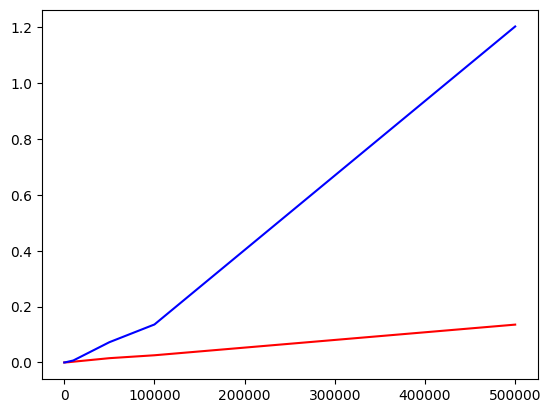

In [18]:
plotSieves()

In [19]:
def testPrimes():
	numTimes = int(input())
	for numTries in range(0, numTimes):
		maxPrime = int(input())
		sievePrimes0(list(range(2, maxPrime)))
		sievePrimes1(list(range(2, maxPrime)))

testPrimes()

In [20]:
def mystery(limit):
	nums = []
	for n in range(2, limit):
		for x in range(2, n):
			if n % x == 0:
				print("a")
				break
		else:
			print("b")
			nums.append(n)
	return nums

print (mystery(3))

b
[2]


In [21]:
def pydiv(n, d):
	if d != 0:
		return n / d

In [22]:
x = pydiv(1, 0)
print (x)
y = pydiv(1, 1)
print (y)

None
1.0


Both cells below have the same functionality, but the first one is more readable and the second one is more compact.

In [23]:
def perm(n, l):
	perml = []
	if len(l) == 1:
		return [l]
	else:
		if len(l) != n:
			for i in range(0, len(l)):
				auxl = l.copy()
				auxl.remove(auxl[i])
				aux = perm(n, auxl)
				for j in aux:
					if j not in perml:
						perml.append(j)
		else:
			for i in range(0, len(l)):
				auxl = l.copy()
				auxl.remove(auxl[i])
				aux = perm(n - 1, auxl)
				for j in aux:
					if [l[i]] + j not in perml:
						perml.append([l[i]] + j)

	return perml

In [62]:
def perm(n, l):
	perml = []
	if len(l) == 1:
		return [l]
	for i in range(0, len(l)):
		auxl = l.copy()
		auxl.remove(auxl[i])
		nn = n
		if len(l) == n:
			nn -= 1
		p = perm(nn, auxl)
		for j in p:
			aux = j
			if len(l) == n:
				aux = [l[i]] + aux
			if aux not in perml:
				perml.append(aux)
	return perml

In [25]:
x = perm(2, ['a', 'b', 'c', 'd', 'e'])
x

[['d', 'e'],
 ['e', 'd'],
 ['c', 'e'],
 ['e', 'c'],
 ['c', 'd'],
 ['d', 'c'],
 ['b', 'e'],
 ['e', 'b'],
 ['b', 'd'],
 ['d', 'b'],
 ['b', 'c'],
 ['c', 'b'],
 ['a', 'e'],
 ['e', 'a'],
 ['a', 'd'],
 ['d', 'a'],
 ['a', 'c'],
 ['c', 'a'],
 ['a', 'b'],
 ['b', 'a']]

In [109]:
def getStringList(i):
	l = list(map(str, str(i)))
	while len(l) != 4:
		l = ['0'] + l
	return l

In [115]:
def distinctDigits(l):
	for i in range(0, len(l)):
		for j in range(i + 1, len(l)):
			if l[i] == l[j]:
				return False
	return True
	

In [104]:
def getPrimePermutations(perml, primes):
	primePerm = []
	for i in range(len(perml) - 1, -1, -1):
		numStr = ''
		for j in range(0, len(perml[i])):
			numStr += perml[i][j]
		num = int(numStr)
		if num in primes:
			primePerm.append(num)
	return primePerm

In [156]:
def findAP(primePerm):
	for i in range(0, len(primePerm)):
		for j in range(i + 1, len(primePerm)):
			for k in range(j + 1, len(primePerm)):
				if abs(primePerm[j] - primePerm[i]) == abs(primePerm[k] - primePerm[j]):
					return [primePerm[i], primePerm[j], primePerm[k]]
	return []

In [173]:
def isInList(n, l):
	for i in l:
		if n in i:
			return True
	return False

In [176]:
def findSequences():
	sequences = []
	primes = sievePrimes1(list(range(2, 10000)))
	for p in primes:
		l = getStringList(p)
		if not distinctDigits(l):
			continue
		perml = perm(4, l)
		primePerm = getPrimePermutations(perml, primes)
		apPerm = findAP(primePerm)
		if len(apPerm) > 0:
			if not isInList(apPerm[0], sequences):
				sequences.append(apPerm)
	return sequences


In [178]:
findSequences()

[[1063, 613, 163], [7039, 3709, 379], [8147, 4817, 1487]]

# Lista 15

First-Fit

In [358]:
NULL = -1 # The null link

class HeapManager:
  """Implements a very simple heap manager."""

  def __init__(self, initialMemory):
    """Constructor. Parameter initialMemory is the array of data that we will
       use to represent the memory."""
    self.memory = initialMemory
    self.memory[0] = self.memory.__len__()
    self.memory[1] = NULL
    self.freeStart = 0


  def allocate(self, requestSize):
    """Allocates a block of data, and return its address. The parameter
       requestSize is the amount of space that must be allocaed."""
    size = requestSize + 1
    # Do first-fit search: linear search of the free list for the first block
    # of sufficient size.
    p = self.freeStart
    lag = NULL
    while p != NULL and self.memory[p] < size:
      lag = p
      p = self.memory[p + 1]
    if p == NULL:
      raise MemoryError()
    nextFree = self.memory[p + 1]
    # Now p is the index of a block of sufficient size,
    # lag is the index of p's predecessor in the
    # free list, or NULL, and nextFree is the index of
    # p's successor in the free list, or NULL.
    # If the block has more space than we need, carve
    # out what we need from the front and return the
    # unused end part to the free list.
    unused = self.memory[p] - size
    if unused > 1:
      nextFree = p + size
      self.memory[nextFree] = unused
      self.memory[nextFree + 1] = self.memory[p + 1]
      self.memory[p] = size
    if lag == NULL:
      self.freeStart = nextFree
    else:
      self.memory[lag + 1] = nextFree
    return p + 1

  def deallocate(self, address):
    """Deallocates the block of data that starts at address. This works only
       if the block address is one that was returned by allocate and has not
       yet been deallocated."""
    addr = address - 1
    self.memory[addr + 1] = self.freeStart
    self.freeStart = addr

In [333]:
def test():
  h = HeapManager([0 for x in range(0, 10)])
  print("Memory = ", h.memory)
  a = h.allocate(4)
  print("a = ", a, ", Memory = ", h.memory)
  b = h.allocate(1)
  print("b = ", b, ", Memory = ", h.memory)
  h.deallocate(a)
  c = h.allocate(2)
  print("c = ", c, ", Memory = ", h.memory)

test()

Memory =  [10, -1, 0, 0, 0, 0, 0, 0, 0, 0]
p:  0
a =  1 , Memory =  [5, -1, 0, 0, 0, 5, -1, 0, 0, 0]
p:  5
b =  6 , Memory =  [5, -1, 0, 0, 0, 2, -1, 3, -1, 0]
p:  0
c =  1 , Memory =  [3, 7, 0, 2, 7, 2, -1, 3, -1, 0]


Best-Fit

In [356]:
NULL = -1 # The null link

class HeapManager:
  """Implements a very simple heap manager."""

  def __init__(self, initialMemory):
    """Constructor. Parameter initialMemory is the array of data that we will
       use to represent the memory."""
    self.memory = initialMemory
    self.memory[0] = self.memory.__len__()
    self.memory[1] = NULL
    self.freeStart = 0


  def allocate(self, requestSize):
    """Allocates a block of data, and return its address. The parameter
       requestSize is the amount of space that must be allocaed."""
    size = requestSize + 1
    # Do first-fit search: linear search of the free list for the first block
    # of sufficient size.
    p = self.freeStart
    lag = NULL

    pArray = []
    while p != NULL:
      lag = p
      pArray.append(p)
      p = self.memory[p + 1]
    if len(pArray) == 0:
      raise MemoryError()
    bestLag = NULL
    bestP = pArray[0]
    bestFree = 0
    for i in range(1, len(pArray)):
      bestFree = self.memory[bestP] - size
      if bestFree == 0:
        break
      if bestFree < 0:
        bestP = pArray[i]
        bestLag = pArray[i - 1]
        bestFree = self.memory[bestP] - size
        continue
      iFree = self.memory[pArray[i]] - size
      if iFree < 0:
        continue
      if bestFree > iFree:
        bestP = pArray[i]
        bestLag = pArray[i - 1]
    if bestFree < 0:
      raise MemoryError()
    p = bestP
    lag = bestLag
	
    nextFree = self.memory[p + 1]
    # Now p is the index of a block of sufficient size,
    # lag is the index of p's predecessor in the
    # free list, or NULL, and nextFree is the index of
    # p's successor in the free list, or NULL.
    # If the block has more space than we need, carve
    # out what we need from the front and return the
    # unused end part to the free list.
    unused = self.memory[p] - size
    if unused > 1:
      nextFree = p + size
      self.memory[nextFree] = unused
      self.memory[nextFree + 1] = self.memory[p + 1]
      self.memory[p] = size
    if lag == NULL:
      self.freeStart = nextFree
    else:
      self.memory[lag + 1] = nextFree
    return p + 1

  def deallocate(self, address):
      """Deallocates the block of data that starts at address. This works only
      if the block address is one that was returned by allocate and has not
      yet been deallocated."""
      addr = address - 1
      self.memory[addr + 1] = self.freeStart
      self.freeStart = addr

In [360]:
# Works with first-fit but not with best-fit
mm = HeapManager([0 for x in range(0, 11)])
print("Memory = ", mm.memory)
a = mm.allocate(4)
print("a = ", a, ", Memory = ", mm.memory)
b = mm.allocate(1)
print("b = ", b, ", Memory = ", mm.memory)
c = mm.allocate(3)
print("c = ", c, ", Memory = ", mm.memory)
mm.deallocate(c)
print("Memory = ", mm.memory)
mm.deallocate(a)
print("Memory = ", mm.memory)
d = mm.allocate(1)
print("d = ", d, ", Memory = ", mm.memory)
e = mm.allocate(2)
print("e = ", e, ", Memory = ", mm.memory)
f = mm.allocate(3)
print("f = ", f, ", Memory = ", mm.memory)

Memory =  [11, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
a =  1 , Memory =  [5, -1, 0, 0, 0, 6, -1, 0, 0, 0, 0]
b =  6 , Memory =  [5, -1, 0, 0, 0, 2, -1, 4, -1, 0, 0]
c =  8 , Memory =  [5, -1, 0, 0, 0, 2, -1, 4, -1, 0, 0]
Memory =  [5, -1, 0, 0, 0, 2, -1, 4, -1, 0, 0]
Memory =  [5, 7, 0, 0, 0, 2, -1, 4, -1, 0, 0]
d =  1 , Memory =  [2, 7, 3, 7, 0, 2, -1, 4, -1, 0, 0]
e =  3 , Memory =  [2, 7, 3, 7, 0, 2, -1, 4, -1, 0, 0]
f =  8 , Memory =  [2, 7, 3, 7, 0, 2, -1, 4, -1, 0, 0]


In [ ]:
# Works with first-fit but not with best-fit
mm = HeapManager([0 for x in range(0, 11)])
a = mm.allocate(4)
b = mm.allocate(1)
c = mm.allocate(3)
mm.deallocate(c)
mm.deallocate(a)
d = mm.allocate(1)
e = mm.allocate(2)
f = mm.allocate(3)